In [1]:
#マウント
from google.colab import drive
drive.mount('/content/drive')
# フォルダの移動には"%cd"を使用します。
# 作業フォルダへ移動
%cd /content/drive/'My Drive'/総合演習/
# 現在のフォルダの中身を表示
%ls

Mounted at /content/drive
/content/drive/My Drive/総合演習
holoDisplay1.bmp  holoPhase.mat  kadai2.ipynb  kukei.bmp
holoDisplay2.bmp  kadai1.ipynb   kadai3.ipynb  Untitled0.ipynb


In [2]:
# 必要はモジュールインポート
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

size = 2048
z=200
m=np.arange(-size/2,size/2,1)
lam = 532*10**(-6)
dx = 6.4*10**(-3)
dy = dx
Fx,Fy=np.meshgrid(m,m)

data_original = np.array(Image.open('holoDisplay1.bmp'))
data = data_original.astype(float)
shape_data = data.shape
p = shape_data[0]
q = shape_data[1]
canvas = np.zeros((size,size))
index_x = np.arange(size/2-p/2,size/2+p/2,dtype=int)
index_y = np.arange(size/2-q/2,size/2+q/2,dtype=int)
grid_x,grid_y=np.meshgrid(index_x,index_y)
canvas[grid_x,grid_y] = np.transpose(data)
data = canvas
data = 2*np.pi*data/255
u0 = np.exp(1j*data)

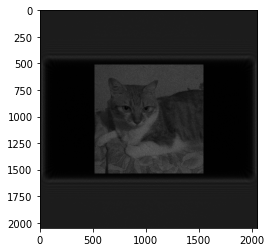

In [4]:
fu0=np.fft.fftshift(np.fft.fft2(u0))
fexp=np.exp(-1j*np.pi*lam*z*(Fx*Fx/size/size/dx/dx+Fy*Fy/size/size/dy/dy))
fup=fu0*fexp
up=np.fft.ifft2(np.fft.fftshift(fup))
plt.figure()
plt.imshow(np.abs(up)**2,cmap="gray")
plt.show()  

In [5]:
import scipy.io
mat=scipy.io.loadmat('holoPhase.mat')

In [6]:
data=mat['data']
size = 1024
m=np.arange(-size/2,size/2,1)
lam = 643*10**(-6)
dx = 3.45*10**(-3)
dy = dx
Fx,Fy=np.meshgrid(m,m)

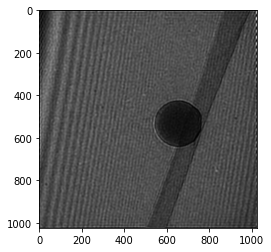

In [7]:
z=100
fu0=np.fft.fftshift(np.fft.fft2(data))
fexp=np.exp(-1j*np.pi*lam*z*(Fx*Fx/size/size/dx/dx+Fy*Fy/size/size/dy/dy))
fup=fu0*fexp
up=np.fft.ifft2(np.fft.fftshift(fup))
plt.figure()
plt.imshow(np.abs(up)**2,cmap="gray")
plt.show()  